In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

module_path = (Path().resolve().parent/ "Modules")
sys.path.append(str(module_path))

import my_modules, model_tuner, model_tuner_multi, features, feature_selector, skill_calculators
pd.set_option("display.max_columns", None)
pd.option_context(
        'display.max_info_rows', None,     # 行しきい値を無制限
        'display.max_info_columns', None
        )

plt.rcParams['font.family'] = 'Yu Gothic'

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

c:\Users\ken05\Documents\others\HORSE_RACING\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../Data/train_data_JV_2008.csv", encoding="cp932")
df = my_modules.preprocessing(df)
df = my_modules.common_process(df)
df.head()

C:\Users\ken05\Documents\others\HORSE_RACING\Modules\my_modules.py:77: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["place_num"] = df["place"].replace(place_dict).astype(int)


,race_id,year,month,day,times,place,daily,race_num,horse,jockey_id,trainer_id,owner,breeding_farm,breeding_place,horse_N,waku_num,horse_num,class_code,track_code,corner_num,dist,state,weather,age_code,sex,age,basis_weight,blinker,weight,inc_dec,weight_code,win_odds,win_mul_odds_Hi,win_mul_odds_Lo,rank,time_diff,time,corner1_rank,corner2_rank,corner3_rank,corner4_rank,last_3F_time,last_3F_rank,Ave_3F,PCI,PCI3,RPCI,last_3F_time_diff,leg,pop,prize,error_code,father,mother,broodmare_sire,broodmare_sire_type,horse_color,id,id_for_fold,field_type,flat_or_jump,turn_type,race_type,waku,datetime,season,age_type,dist_type,is_1st_rank,is_in_3rd_rank,target
830948,200801050601010106,2008,1,5,1,中山,1,1,クイックマインド,1091,1051,飯田正剛,千代田牧場,静内町,16,3,6,7,24,2,1200,良,曇,12,牝,3,54.0,NaN,460.0,-4.0,3,101.6,32.7,19.6,16,2.8,1167.0,NaN,NaN,5.0,4.0,41.6,16,35.1,34.4,41.03,38.5,0.4,先行,13.0,0,0,ホワイトマズル,ゴールデンプランクスター,Seeking the Gold,ネイティヴダンサー系,鹿毛,2005100581,2008010506010101,ダート,平地,R,中山ダート1200,inner,2008-01-05 01:02:00,winter,3,splint,0,0,0
830933,200801050601010102,2008,1,5,1,中山,1,1,メジロアリエル,733,138,メジロ牧場,メジロ牧場,洞爺村,16,1,2,7,24,2,1200,良,曇,12,牝,3,54.0,NaN,450.0,-10.0,3,8.1,3.0,2.0,1,-0.0,1139.0,NaN,NaN,1.0,1.0,39.2,4,34.7,38.5,41.03,38.5,0.0,逃げ,4.0,500,0,サクラバクシンオー,メジロダーリング,Green Desert,ニアークティック系,鹿毛,2005102028,2008010506010101,ダート,平地,R,中山ダート1200,inner,2008-01-05 01:02:00,winter,3,splint,1,1,1
830934,200801050601010105,2008,1,5,1,中山,1,1,ヒロアンジェロ,663,1088,北所直人,見上牧場,静内町,16,3,5,7,24,2,1200,良,曇,12,牝,3,54.0,NaN,482.0,2.0,3,13.4,4.7,3.0,2,0.0,1139.0,NaN,NaN,10.0,7.0,38.5,1,35.4,41.9,41.03,38.5,0.7,中団,6.0,200,0,グラスワンダー,スポーデズブルー,Sadler's Wells,ニアークティック系,鹿毛,2005101044,2008010506010101,ダート,平地,R,中山ダート1200,inner,2008-01-05 01:02:00,winter,3,splint,0,1,2
830935,200801050601010103,2008,1,5,1,中山,1,1,キャスタスペルミー,684,1054,キャロットファーム,片山修,三石町,16,2,3,7,24,2,1200,良,曇,12,牝,3,54.0,NaN,458.0,4.0,3,8.2,3.3,2.2,3,0.3,1142.0,NaN,NaN,13.0,8.0,38.5,1,35.7,42.7,41.03,38.5,1.0,中団,5.0,130,0,フレンチデピュティ,ミラクルミユキ,ノーザンテースト,ニアークティック系,鹿毛,2005104156,2008010506010101,ダート,平地,R,中山ダート1200,inner,2008-01-05 01:02:00,winter,3,splint,0,1,3
830936,200801050601010107,2008,1,5,1,中山,1,1,デルマベガ,1095,436,浅沼廣幸,ファニーヒルファーム,門別町,16,4,7,7,24,2,1200,良,曇,12,牝,3,54.0,NaN,456.0,-2.0,3,2.9,1.5,1.2,4,0.4,1143.0,NaN,NaN,2.0,2.0,39.5,6,34.8,38.1,41.03,38.5,0.1,先行,1.0,75,0,スリリングサンデー,アドマイヤアイリス,ジェイドロバリー,ネイティヴダンサー系,栗毛,2005103612,2008010506010101,ダート,平地,R,中山ダート1200,inner,2008-01-05 01:02:00,winter,3,splint,0,0,0


In [3]:
df3 = df[df.year > 2020].copy()

In [4]:
glicko2 = skill_calculators.glicko2_calculator(target_col="jockey_id", prefix="jockey", rating_period_days=14
                                               , rd_cap=100, rd_floor=20, conf_mult=3.0)
df4, feature_col = glicko2.fit_transform(df3, [])

In [5]:
df4["jockey_Glicko2"].sort_values(ascending=False).head()

207175    3000.0
207128    3000.0
207019    3000.0
206030    3000.0
205981    3000.0
Name: jockey_Glicko2, dtype: float64

(array([4.00000e+00, 8.00000e+00, 1.30000e+01, 1.80000e+01, 2.40000e+01,
        1.70000e+01, 4.80000e+01, 7.60000e+01, 5.50000e+01, 2.07406e+05]),
 array([-43641.16275403, -38977.04647863, -34312.93020322, -29648.81392782,
        -24984.69765242, -20320.58137701, -15656.46510161, -10992.34882621,
         -6328.23255081,  -1664.1162754 ,   3000.        ]),
 <BarContainer object of 10 artists>)

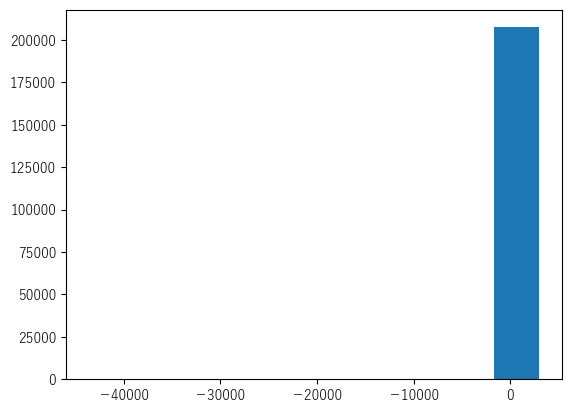

In [6]:
plt.hist(df4["jockey_Glicko2"])

In [7]:
df4.describe()

,race_id,year,month,day,times,race_num,trainer_id,waku_num,horse_num,corner_num,dist,age,basis_weight,weight,inc_dec,win_odds,win_mul_odds_Hi,win_mul_odds_Lo,rank,time_diff,time,corner1_rank,corner2_rank,corner3_rank,corner4_rank,last_3F_time,last_3F_rank,Ave_3F,PCI,PCI3,RPCI,last_3F_time_diff,pop,prize,error_code,id,datetime,is_1st_rank,is_in_3rd_rank,target,date,jockey_Glicko2,jockey_Glicko2_viz,jockey_Glicko2_RD,jockey_Glicko2_min,jockey_Glicko2_max,jockey_Glicko2_after_racing
count,2.076690e+05,207669.000000,207669.000000,207669.00000,207669.000000,207669.000000,207669.000000,207669.000000,207669.000000,207669.000000,207669.000000,207669.000000,207669.000000,207666.000000,186819.000000,207240.000000,207240.000000,207240.000000,207669.000000,206590.000000,206590.000000,87413.000000,100908.000000,205372.000000,206921.000000,206589.000000,207669.000000,206589.000000,206585.000000,207669.000000,207669.000000,206589.000000,207240.000000,207669.000000,207669.000000,2.076690e+05,207669,207669.000000,207669.000000,207669.000000,207669,207669.000000,207669.000000,207669.000000,207669.000000,207669.000000,207669.000000
mean,2.022846e+17,2022.783882,6.076386,15.84013,2.572531,6.572613,1059.137093,4.755067,7.727653,2.918336,1616.180316,3.581493,55.179721,470.932430,0.363924,69.153187,18.491606,9.278503,7.640539,1.394079,1462.162354,7.066718,7.048311,7.239974,7.228092,37.156728,7.403325,36.571728,48.698764,50.266640,48.672972,0.812363,7.702736,157.854909,0.018785,2.019306e+09,2023-04-01 03:00:46.387472384,0.072264,0.216575,0.433069,2023-03-31 20:22:08.229056512,1490.960968,1510.355342,42.859306,1362.383050,1619.538887,1486.376607
min,2.021011e+17,2021.000000,1.000000,1.00000,1.000000,1.000000,359.000000,1.000000,1.000000,0.000000,1000.000000,2.000000,48.000000,336.000000,-46.000000,1.100000,1.000000,1.000000,0.000000,-4.300000,539.000000,1.000000,1.000000,1.000000,1.000000,31.400000,0.000000,31.800000,1.900000,33.930000,32.500000,0.000000,1.000000,0.000000,0.000000,2.010102e+09,2021-01-05 01:02:00,0.000000,0.000000,0.000000,2021-01-05 00:00:00,-43641.162754,1000.000000,40.000000,-43941.162754,-43341.162754,-43641.162754
25%,2.022021e+17,2022.000000,3.000000,9.00000,1.000000,3.000000,1055.000000,3.000000,4.000000,2.000000,1300.000000,3.000000,54.000000,450.000000,-4.000000,8.100000,3.200000,1.900000,4.000000,0.500000,1204.000000,3.000000,3.000000,3.000000,3.000000,35.400000,4.000000,35.600000,44.900000,46.870000,45.200000,0.300000,4.000000,0.000000,0.000000,2.018104e+09,2022-02-13 03:01:00,0.000000,0.000000,0.000000,2022-02-13 00:00:00,1416.985147,1416.985147,40.000000,1287.922696,1542.931178,1414.258691
50%,2.023040e+17,2023.000000,6.000000,16.00000,2.000000,7.000000,1101.000000,5.000000,7.000000,2.000000,1600.000000,3.000000,55.000000,472.000000,0.000000,25.000000,7.300000,4.000000,7.000000,1.100000,1389.000000,7.000000,7.000000,7.000000,7.000000,37.000000,7.000000,36.600000,48.600000,49.870000,48.300000,0.700000,7.000000,0.000000,0.000000,2.019106e+09,2023-04-01 01:03:00,0.000000,0.000000,0.000000,2023-04-01 00:00:00,1502.568914,1502.568914,40.000000,1376.672068,1629.962259,1502.139894
75%,2.024051e+17,2024.000000,9.000000,23.00000,4.000000,10.000000,1148.000000,7.000000,11.000000,4.000000,1800.000000,4.000000,56.000000,492.000000,4.000000,83.200000,20.100000,10.600000,11.000000,1.900000,1561.000000,10.000000,10.000000,11.000000,11.000000,38.600000,11.000000,37.580000,52.500000,53.400000,51.900000,1.200000,11.000000,130.000000,0.000000,2.021100e+09,2024-05-12 03:01:00,0.000000,0.000000,0.000000,2024-05-12 00:00:00,1597.118337,1597.118337,40.319922,1471.887539,1726.610742,1598.709205
max,2.025063e+17,2025.000000,12.000000,31.00000,7.000000,12.000000,5785.000000,8.000000,18.000000,6.000000,3600.000000,12.000000,61.000000,630.000000,66.000000,999.900000,631.600000,217.400000,18.000000,89.500000,3495.000000,18.000000,18.000000,18.000000,18.000000,98.400000,18.000000,48.900000,80.400000,70.470000,70.500000,21.300000,18.000000,50000.000000

In [8]:
df4[df4["jockey_Glicko2"] == 500]["jockey_id"].unique()

array([], dtype=object)

In [9]:
df4[df4["jockey_id"] == 1115].shape

(1753, 78)

(array([18628., 18809., 18993., 19174., 19358., 19539., 19723., 19905.,
        20089., 20270.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01'),
  Text(19905.0, 0, '2024-07'),
  Text(20089.0, 0, '2025-01'),
  Text(20270.0, 0, '2025-07')])

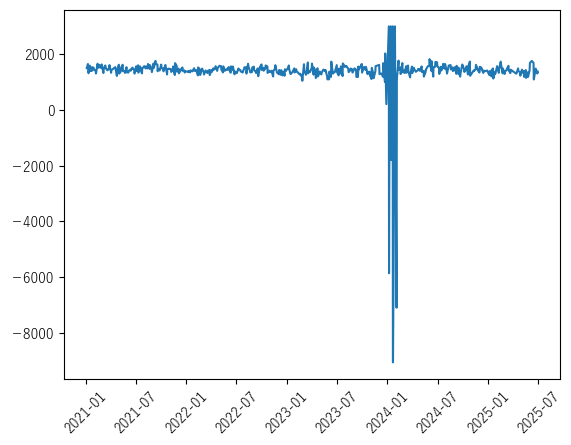

In [10]:
tmp = df4[df4["jockey_id"] == 1181]
plt.plot(tmp["datetime"], tmp["jockey_Glicko2"])
plt.xticks(rotation=45)

In [11]:
glicko2_horse = skill_calculators.glicko2_calculator(target_col="horse", prefix="horse", rating_period_days=30)
df_horse, feature_col_horse = glicko2_horse.fit_transform(df3, [])
df_horse.head()

,race_id,year,month,day,times,place,daily,race_num,horse,jockey_id,trainer_id,owner,breeding_farm,breeding_place,horse_N,waku_num,horse_num,class_code,track_code,corner_num,dist,state,weather,age_code,sex,age,basis_weight,blinker,weight,inc_dec,weight_code,win_odds,win_mul_odds_Hi,win_mul_odds_Lo,rank,time_diff,time,corner1_rank,corner2_rank,corner3_rank,corner4_rank,last_3F_time,last_3F_rank,Ave_3F,PCI,PCI3,RPCI,last_3F_time_diff,leg,pop,prize,error_code,father,mother,broodmare_sire,broodmare_sire_type,horse_color,id,id_for_fold,field_type,flat_or_jump,turn_type,race_type,waku,datetime,season,age_type,dist_type,is_1st_rank,is_in_3rd_rank,target,date,horse_Glicko2,horse_Glicko2_viz,horse_Glicko2_RD,horse_Glicko2_min,horse_Glicko2_max,horse_Glicko2_after_racing
0,202101050601010116,2021,1,5,1,中山,1,1,バルネージュ,1162,1106,手嶋康雄,佐竹学,新ひだか町,16,8,16,7,24,2,1200,良,晴,12,セ,3,56.0,NaN,516.0,14.0,3,9.0,4.3,2.0,5,0.5,1130.0,NaN,NaN,3.0,2.0,38.4,8,34.6,40.1,41.67,40.3,0.2,先行,4.0,51,0,ドゥラメンテ,ミスホーユー,ダイナガリバー,ニアークティック系,芦毛,2018103832,2021010506010101,ダート,平地,R,中山ダート1200,outer,2021-01-05 01:02:00,winter,3,splint,0,0,0,2021-01-05,1500.0,1500.0,250.0,750.0,2250.0,1671.128770
1,202101050601010106,2021,1,5,1,中山,1,1,シーオブクラウズ,1043,1118,岡田牧雄,千代田牧場,新ひだか町,16,3,6,7,24,2,1200,良,晴,12,牡,3,56.0,NaN,472.0,4.0,3,41.6,13.1,5.7,10,1.3,1138.0,NaN,NaN,6.0,6.0,39.0,13,34.8,39.2,41.67,40.3,0.4,中団,9.0,0,0,クロフネ,エクセレントピーク,アドマイヤジャパン,ロイヤルチャージャー系,芦毛,2018104056,2021010506010101,ダート,平地,R,中山ダート1200,inner,2021-01-05 01:02:00,winter,3,splint,0,0,0,2021-01-05,1500.0,1500.0,250.0,750.0,2250.0,1426.659099
2,202101050601010101,2021,1,5,1,中山,1,1,ネオトリニティー,1029,1171,フィールドレーシング,村上欽哉,新冠町,16,1,1,7,24,2,1200,良,晴,12,牝,3,54.0,NaN,414.0,-14.0,3,103.0,32.1,13.5,11,1.4,1139.0,NaN,NaN,14.0,12.0,38.3,6,35.6,43.0,41.67,40.3,1.2,後方,11.0,0,0,ヘニーヒューズ,ニシノフジムスメ,キングヘイロー,ニアークティック系,鹿毛,2018102289,2021010506010101,ダート,平地,R,中山ダート1200,inner,2021-01-05 01:02:00,winter,3,splint,0,0,0,2021-01-05,1500.0,1500.0,250.0,750.0,2250.0,1377.765164
3,202101050601010102,2021,1,5,1,中山,1,1,シゲルブイン,1179,1174,森中蕃,シンボリ牧場,日高町,16,1,2,7,24,2,1200,良,晴,12,牡,3,55.0,NaN,460.0,6.0,3,108.4,38.6,16.2,7,1.0,1135.0,NaN,NaN,14.0,12.0,37.9,3,35.6,43.9,41.67,40.3,1.2,後方,12.0,0,0,キンシャサノキセキ,テンダーエモーション,Pivotal,ニアークティック系,鹿毛,2018100550,2021010506010101,ダート,平地,R,中山ダート1200,inner,2021-01-05 01:02:00,winter,3,splint,0,0,0,2021-01-05,1500.0,1500.0,250.0,750.0,2250.0,1573.340901
4,202101050601010108,2021,1,5,1,中山,1,1,ナンヨーノワール,1126,1008,中村徳也,三好牧場,浦河町,16,4,8,7,24,2,1200,良,晴,12,牡,3,56.0,NaN,446.0,-2.0,3,29.5,11.9,5.2,12,1.4,1139.0,NaN,NaN,6.0,9.0,39.0,13,34.9,39.5,41.67,40.3,0.5,中団,8.0,0,0,グランプリボス,ラブインザミスト,ルールオブロー,ネイティヴダンサー系,鹿毛,2018103366,2021010506010101,ダート,平地,R,中山ダート1200,inner,2021-01-05 01:02:00,winter,3,splint,0,0,0,2021-01-05,1500.0,1500.0,250.0,750.0,2250.0,1328.871230


(array([2.0410e+03, 1.9125e+04, 6.6888e+04, 6.5169e+04, 4.5315e+04,
        8.6290e+03, 4.8600e+02, 1.1000e+01, 4.0000e+00, 1.0000e+00]),
 array([ 918.50214337, 1126.65192903, 1334.80171469, 1542.95150036,
        1751.10128602, 1959.25107168, 2167.40085735, 2375.55064301,
        2583.70042867, 2791.85021434, 3000.        ]),
 <BarContainer object of 10 artists>)

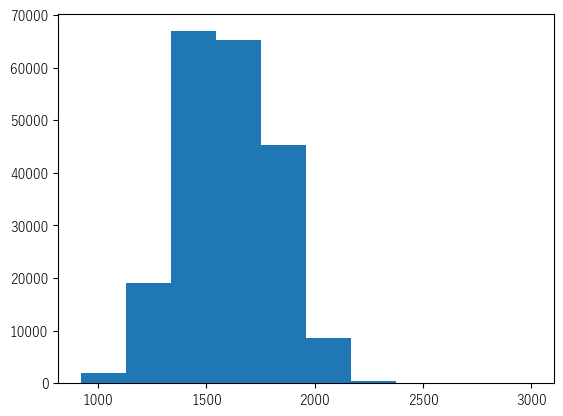

In [12]:
plt.hist(df_horse["horse_Glicko2"])